In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier , RandomForestClassifier , StackingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Data Exploration 

### Basic Exploration 

Check the name of the columns

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Get some information about the data

In [4]:
len(df.columns)

35

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Our Data has:
- 26 integer variables
- 9 object variables

### Statistical Exploration

Get descriptive statistics for the numeric variables

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Remove `EmployeeCount`, `EmployeeNumber`

In [7]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

The concerning Variables are:
- `JobLevel`
- `MonthlyIncome`
- `NumCompaniesWorked`
- `PerformanceRating`
- `TotalWorkingYears`
- `YearsAtCompany`
- `YearsSinceLastPromotion`

In [8]:
df[['JobLevel','MonthlyIncome','NumCompaniesWorked','PerformanceRating','TotalWorkingYears','YearsAtCompany',
   'YearsSinceLastPromotion' ]].kurt()

JobLevel                   0.399152
MonthlyIncome              1.005233
NumCompaniesWorked         0.010214
PerformanceRating          1.695939
TotalWorkingYears          0.918270
YearsAtCompany             3.935509
YearsSinceLastPromotion    3.612673
dtype: float64

In [9]:
df.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- Problems with the features `EducationField` e `JobRole` (Too many unique values)

- Feature `Over18` can be removed. Only one unique.

#### Missing Values

In [10]:
df.isnull().sum().sum()

0

- No missing values to analyse

## ML model

In [11]:
SEED = 777

### Model preparation

In [12]:
MLdata = df.copy()
MLdata.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis = 1, inplace = True)

- Remove 4 features that are univariated

In [13]:
cols_cat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
cols_cat_not_ord = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
cols_num = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

cols_feat = cols_cat + cols_cat_not_ord + cols_num
col_target = ['Attrition'] # Yes/No

In [14]:
# Total Education Years
education_dict = {
        1: 10, # HighSchool
        2: 12, # College
        3: 16, # Bachelor
        4: 18, # Master
        5: 22  # PhD
    }
MLdata['YearsEducation'] = MLdata['Education'].replace(to_replace = education_dict)
cols_num = cols_num + ['YearsEducation']
cols_feat = cols_cat + cols_cat_not_ord + cols_num

In [15]:
# Total Satisfaction

MLdata['TotalSatisfaction'] = MLdata['EnvironmentSatisfaction'] + MLdata['JobInvolvement'] + MLdata['JobSatisfaction'] +MLdata['RelationshipSatisfaction'] + MLdata['WorkLifeBalance']

cols_num = cols_num + ['TotalSatisfaction']
cols_feat = cols_cat + cols_cat_not_ord + cols_num

#### Label encoder for object features

In [16]:
le=LabelEncoder()
MLdata['Attrition'] = le.fit_transform(MLdata['Attrition'])
MLdata['BusinessTravel'] = le.fit_transform(MLdata['BusinessTravel'])
MLdata['Department'] = le.fit_transform(MLdata['Department'])
MLdata['EducationField'] = le.fit_transform(MLdata['EducationField'])
MLdata['Gender'] = le.fit_transform(MLdata['Gender'])
MLdata['JobRole'] = le.fit_transform(MLdata['JobRole'])
MLdata['MaritalStatus'] = le.fit_transform(MLdata['MaritalStatus'])
MLdata['OverTime'] = le.fit_transform(MLdata['OverTime'])
MLdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsEducation,TotalSatisfaction
0,41,1,2,1102,2,1,2,1,2,0,...,0,8,0,1,6,4,0,5,12,11
1,49,0,1,279,1,8,1,1,3,1,...,1,10,3,3,10,7,1,7,10,14
2,37,1,2,1373,1,2,2,4,4,1,...,0,7,3,3,0,0,0,0,12,14
3,33,0,1,1392,1,3,4,1,4,0,...,0,8,3,3,8,7,3,0,18,16
4,27,0,2,591,1,2,1,3,1,1,...,1,6,3,3,2,2,2,2,10,13


#### One Hot Enconding

In [17]:
for col in (cols_cat_not_ord):
    MLdata[col] = MLdata[col].astype('category')
MLdata.dtypes

Age                            int64
Attrition                      int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

In [18]:
MLdata = pd.get_dummies(MLdata, drop_first = True)
MLdata.dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
YearsEducation              int64
TotalSatisfaction           int64
BusinessTravel_1            uint8
BusinessTravel_2            uint8
Department_1                uint8
Department_2  

In [19]:
cols_feat = MLdata.columns
cols_feat = [col for col in cols_feat if col not in ['Attrition']]
print(cols_feat)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsEducation', 'TotalSatisfaction', 'BusinessTravel_1', 'BusinessTravel_2', 'Department_1', 'Department_2', 'EducationField_1', 'EducationField_2', 'EducationField_3', 'EducationField_4', 'EducationField_5', 'Gender_1', 'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 'JobRole_8', 'MaritalStatus_1', 'MaritalStatus_2', 'OverTime_1']


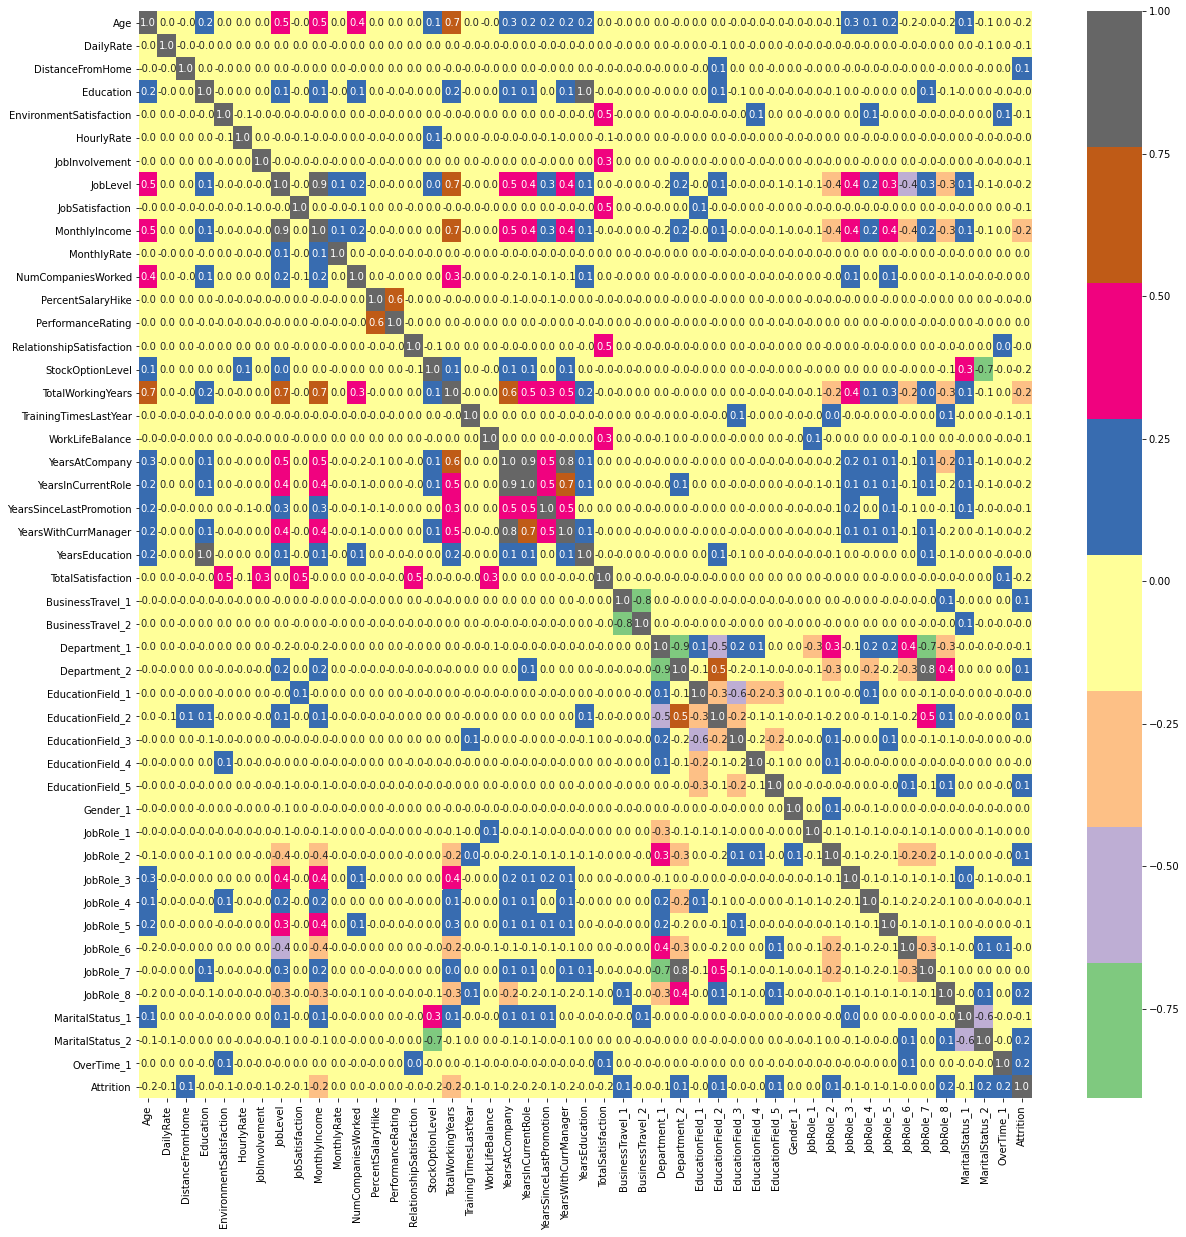

In [20]:
cols = cols_feat + col_target

figure = plt.figure(figsize=(20,20))
sns.heatmap(MLdata[cols].corr(method = 'spearman'),
                annot=True, 
                fmt = ".1f", 
                cmap = "Accent")
plt.show()

In [21]:
cols_feat = [col for col in cols_feat if col not in ['Education', 'YearsInCurrentRole', 'Department_1', 'JobLevel']]

Removing strongly correlated features for the models not to benefict these:
- Removing 'Education' correlated strongly with 'YearsEducation'
- Removing 'YearsInCurrentRole' correlated strongly with 'YearsAtCompany'
- Removing 'Department_1' corrlated strongly with 'Department_2'
- Removing 'JobLevel' correlated stringly with 'MonthlyIncome'

#### Train and Test Data

In [22]:
X = MLdata.drop('Attrition', axis=1)
y = MLdata['Attrition']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED, stratify = MLdata.Attrition, shuffle = True)

#### Dealing with umbalanced data (Oversampling with SMOTE)

We have an unbalanced dataset.

237 Yes out of 1470

In [24]:
MLdata['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

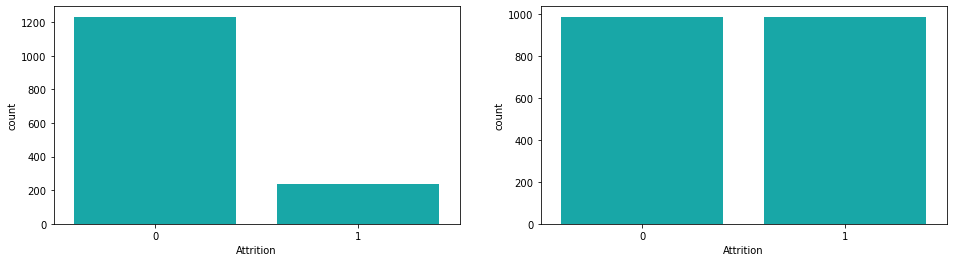

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(ax = axes[0], data = pd.DataFrame(y),x='Attrition', color="c");

cols_cat_idx = [i for (i, col) in enumerate(X.columns) if col in (cols_cat + cols_cat_not_ord)]

oversample = SMOTENC(categorical_features = cols_cat_idx, random_state=SEED)
X_train, y_train = oversample.fit_resample(X_train, y_train)

sns.countplot(ax = axes[1], data = pd.DataFrame(y_train), x = 'Attrition', color="c")
plt.show()

### Testing Machine Learning Models

### Tuning

#### *Random Forest* tuning

In [29]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [140, 175, 200],
    'max_depth': [6, 7, 8,9,10,11,12,13],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_RF, tuned_parameters, scoring="f1_macro", cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_RF = model.best_estimator_
y_true, y_pred = y_test, model_RF.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_RF.score(X_train, y_train))
print('Test:', model_RF.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 140}
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.53      0.45      0.48        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294

Train: 0.9781947261663286
Test: 0.8469387755102041


#### *Gradient Boosting* tuning

In [31]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [60, 200, 300],
    'max_depth': [2, 3,4],
    'min_samples_leaf': [1, 2],
    'criterion': ['friedman_mse', 'mse']
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_GB, tuned_parameters, scoring="f1_macro",cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_GB = model.best_estimator_
y_true, y_pred = y_test, model_GB.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_GB.score(X_train, y_train))
print('Test:', model_GB.score(X_test, y_test))

{'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       247
           1       0.74      0.49      0.59        47

    accuracy                           0.89       294
   macro avg       0.83      0.73      0.76       294
weighted avg       0.88      0.89      0.88       294

Train: 0.9827586206896551
Test: 0.891156462585034


#### *Decision Tree* tuning

In [32]:
# Set the parameters by cross-validation
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 13, 15, 17],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3]
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_DT, tuned_parameters, scoring="f1_macro",cv = 10)
model.fit(X_train, y_train)

print(model.best_params_)

model_DT = model.best_estimator_
y_true, y_pred = y_test, model_DT.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_DT.score(X_train, y_train))
print('Test:', model_DT.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       247
           1       0.33      0.45      0.38        47

    accuracy                           0.77       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.80      0.77      0.78       294

Train: 0.9994929006085193
Test: 0.7687074829931972


#### *SVM* tuning

In [39]:
# Set the parameters by cross-validation
from sklearn import svm
tuned_parameters = {
    
       'C': [1, 10,0.1,100]
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.
model = svm.LinearSVC(max_iter=10000)
model = GridSearchCV(model, tuned_parameters, scoring="f1_macro",cv=10,n_jobs=-1,verbose=4)
model.fit(X_train, y_train)

print(model.best_params_)

model_AB = model.best_estimator_
y_true, y_pred = y_test, model_AB.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_AB.score(X_train, y_train))
print('Test:', model_AB.score(X_test, y_test))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'C': 1}
              precision    recall  f1-score   support

           0       0.97      0.26      0.41       247
           1       0.20      0.96      0.33        47

    accuracy                           0.37       294
   macro avg       0.58      0.61      0.37       294
weighted avg       0.85      0.37      0.40       294

Train: 0.6054766734279919
Test: 0.3741496598639456


#### *Logistic Regression* tuning

In [29]:
# Set the parameters by cross-validation
from sklearn import linear_model
tuned_parameters = {
    'penalty': ('l1', 'l2'),
       'C': [1,0.1,10,20,100]
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.
model = linear_model.LogisticRegression()
model = GridSearchCV(model, tuned_parameters, scoring="f1_macro",cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_AB = model.best_estimator_
y_true, y_pred = y_test, model_AB.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_AB.score(X_train, y_train))
print('Test:', model_AB.score(X_test, y_test))

{'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       247
           1       0.27      0.66      0.39        47

    accuracy                           0.67       294
   macro avg       0.59      0.66      0.58       294
weighted avg       0.81      0.67      0.71       294

Train: 0.7084178498985801
Test: 0.6666666666666666


### Feature Importance

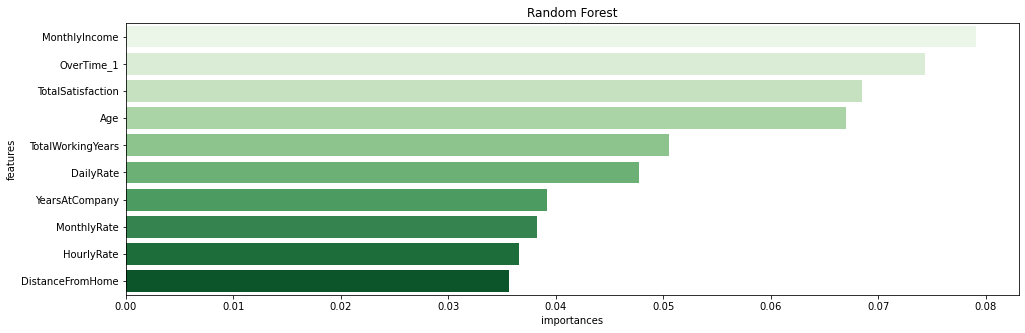

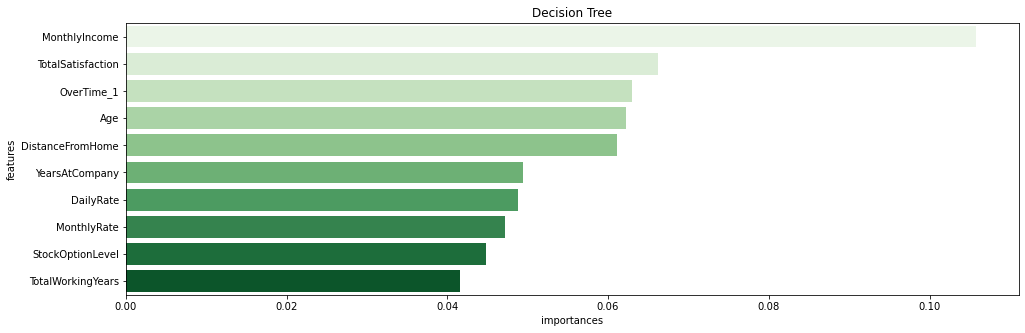

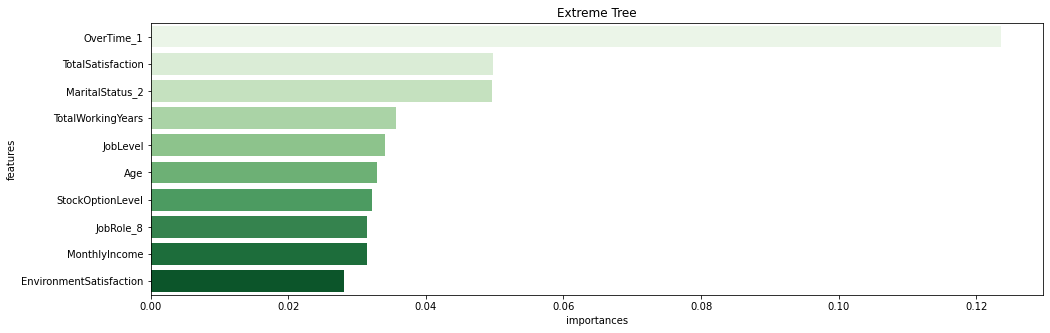

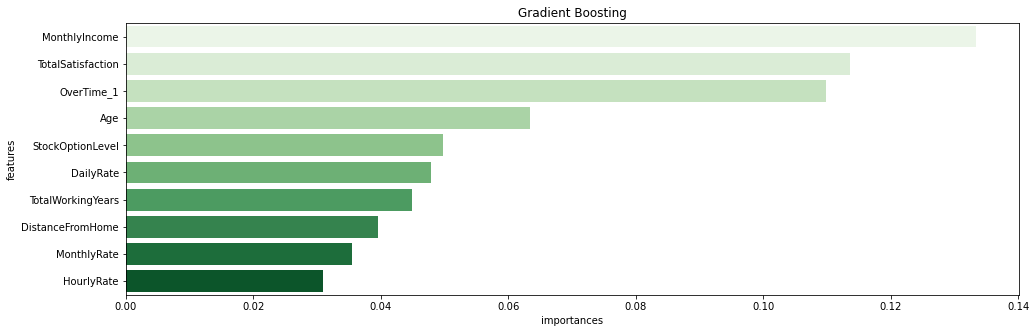

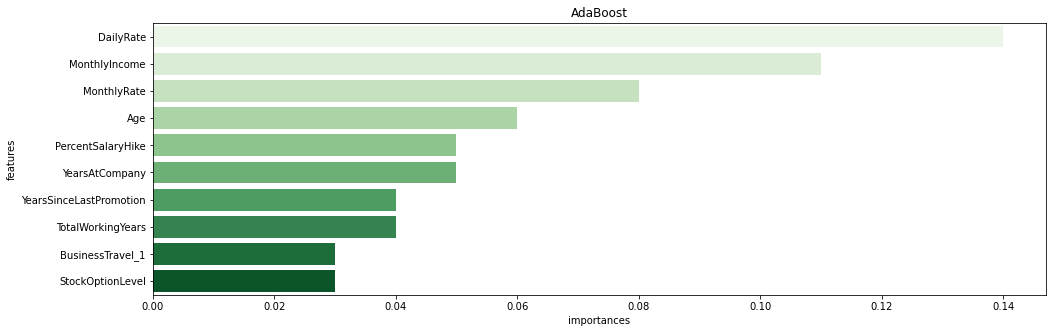

In [34]:
names = ['Random Forest', 'Decision Tree', 'Extreme Tree', 'Gradient Boosting', 'AdaBoost']
models = [model_RF, model_DT, model_XTree, model_GB, model_AB]

for i, model in enumerate(models):
    estimator = model.fit(X, y)
    estimator.score(X, y)
    
    importances = model.feature_importances_
    features = X.columns
    data_tuples = list(zip(importances, features))
    data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
    data = data.sort_values('importances', ascending = False)[:10]
    figure = plt.figure(figsize=(16,5))
    #sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
    ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h')
    ax.set_title(names[i])

#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.3f', label_type='center')

Most relevant Features identified in each model are:
- Total Satisfaction
- Monthly Income
- Overtime

### Final Model - *Stacking Classifier*

In [35]:
base_learners = [('RF', model_RF),
                 ('DT', model_DT),
                 ('XT', model_XTree),
                 ('GB', model_GB),
                  ('AB', model_AB)]

# Second level model (not tuned)
    
meta_learner = MLPClassifier(hidden_layer_sizes=(16, 16), random_state=SEED,early_stopping=True)

#meta_learner = GradientBoostingClassifier(random_state=SEED)

final_model = StackingClassifier(estimators = base_learners, final_estimator = meta_learner).fit(X_train, y_train)

In [36]:
stacked_pred = final_model.predict(X_test)

#### Scores

In [37]:
print(classification_report(y_test, stacked_pred, target_names = ['Stay', 'Leave']))

              precision    recall  f1-score   support

        Stay       0.88      1.00      0.94       247
       Leave       0.94      0.32      0.48        47

    accuracy                           0.89       294
   macro avg       0.91      0.66      0.71       294
weighted avg       0.89      0.89      0.86       294



#### Confusion Matrix

In [38]:
confusion_matrix(y_test,stacked_pred)

array([[246,   1],
       [ 32,  15]])